# MultivariateLinearRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The Model

In [2]:
def multivariate_linear_model(X, y, max_iter=10000, learning_rate=0.01, tolerance=0.1, max_grad=1e10,
                              learning_rate_decay=True):
    '''Runs Gradient Descent on the data.
    Returns Parameters learned by the model and costs, scores and gradient magnitudes lists 
    computed so far during training respectively in order.
    '''
    
    m = X.shape[0]                                      # Training Examples
    n = X.shape[1]                                      # No. of features
    X = np.hstack((np.ones((m,1)), X))                  # Adding a column of ones for 0th feature i.e. Intercept
    w = np.random.randn(n+1, 1)                         # Random initialization of weights
    costs = []
    scores = []
    gradient_magnitudes = []
    
    for t in range(max_iter):
        
        y_cap = np.matmul(X, w)
        error = y - y_cap
        dw = -2 * np.matmul(X.T, error)
        dw = np.clip(dw, -max_grad, max_grad)           # Avoiding Vanishing/Exploding Gradients
        w -= learning_rate * dw
        
        cost = np.matmul(error.T, error)
        score = 1 - (cost / ((y - y.mean()) ** 2).sum()) # coefficient R^2
        costs.append(cost.flatten()[0])
        scores.append(score.flatten()[0])
        
        gradient_magnitude = np.linalg.norm(dw)
        gradient_magnitudes.append(gradient_magnitude)
        if gradient_magnitude < tolerance:
            break
            
        if learning_rate_decay and (t+1) % 100 == 0:
            learning_rate = learning_rate / np.sqrt(t)    # Learning rate decay over every 100th iteration
        
    return w, costs, scores, gradient_magnitudes

def score(X, y, w):
    '''Returns the coefficient R^2 score of the model
    '''
    if X.shape[1] < w.shape[0]:
        X = np.hstack((np.ones((X.shape[0],1)), X))
    y_cap = np.matmul(X, w)
    error = y - y_cap
    cost = np.matmul(error.T, error)
    score = 1 - (cost / ((y - y.mean()) ** 2).sum())
    
    return score.flatten()[0]

def predict(X, w):
    
    if X.shape[1] < w.shape[0]:
        X = np.hstack((np.ones((X.shape[0],1)), X))
    
    return np.matmul(X, w)
    

### Polynomial Regression
#### Polynomial Data
y = 10x<sup>2</sup> + 2x + 5

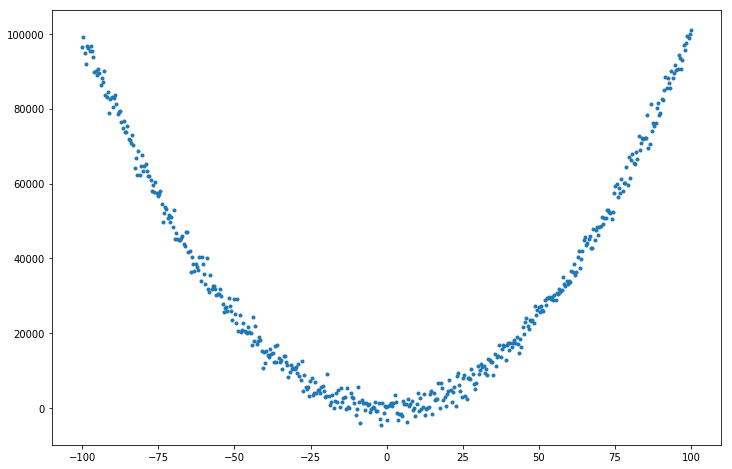

In [3]:
x = np.linspace(-100,100,500).reshape((-1,1))
y =  10 * x**2 + 2 * x + 5
y = y + np.random.randn(x.shape[0],1) * 2000       # Adding noise to data
plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, '.')

#### Fitting a linear model on Polynomial Data

2.294629532606507e-06

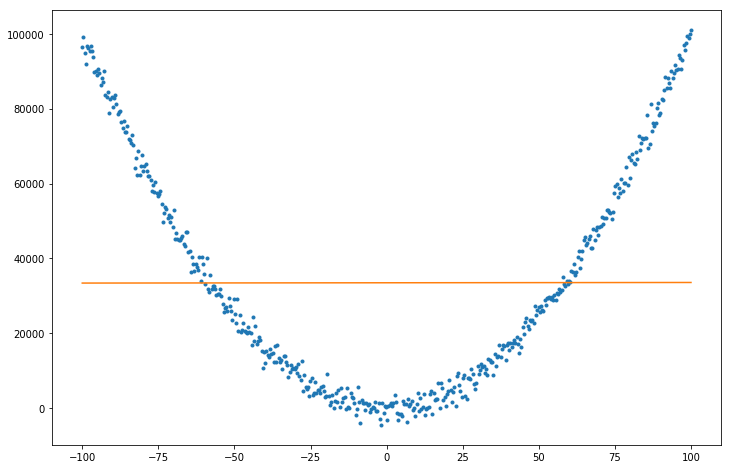

In [4]:
w, _,  _, _ = multivariate_linear_model(x,y, max_iter=100000)
plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, '.', x[:,0], predict(x,w))
score(x,y,w)

We can see that the model was unable to fit the data, no matter how longer we run the gradient descent it is always returning a constant function. It can be verified by the analytical solution.

#### Analytical Solution on Polynomial Data

In [5]:
X = np.hstack((x, np.ones((x.shape[0], 1))))      # Adding a column of ones for intercept
w, b = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
w, b = w[0], b[0]

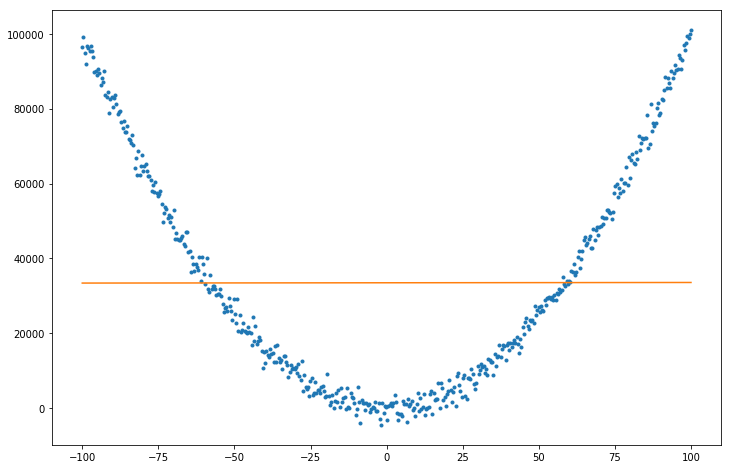

In [6]:
plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, '.', x[:,0], predict(x,np.array([b,w])))

Hence, it is also returning a constant fit for the data.

#### Generating Polynomial Features

X = [x x<sup>2</sup>    x<sup>3</sup>    x<sup>4</sup>    ...   x<sup>degree</sup>]

In [7]:
def generate_polynomial_features(x, degree=2):
    X = np.empty((x.shape[0], degree), dtype=x.dtype)
    
    for i in range(degree):
        X[:,i] = x[:,0] ** (i+1)
    
    return X

In [8]:
X = generate_polynomial_features(x)
X[:9]

array([[ -100.        , 10000.        ],
       [  -99.5991984 ,  9920.00032128],
       [  -99.19839679,  9840.32192642],
       [  -98.79759519,  9760.9648154 ],
       [  -98.39679359,  9681.92898824],
       [  -97.99599198,  9603.21444492],
       [  -97.59519038,  9524.82118546],
       [  -97.19438878,  9446.74920984],
       [  -96.79358717,  9368.99851808]])

We can see that column 2 is the square of column 1

#### Fitting linear model using Polynomial Features

0.9954573622182573

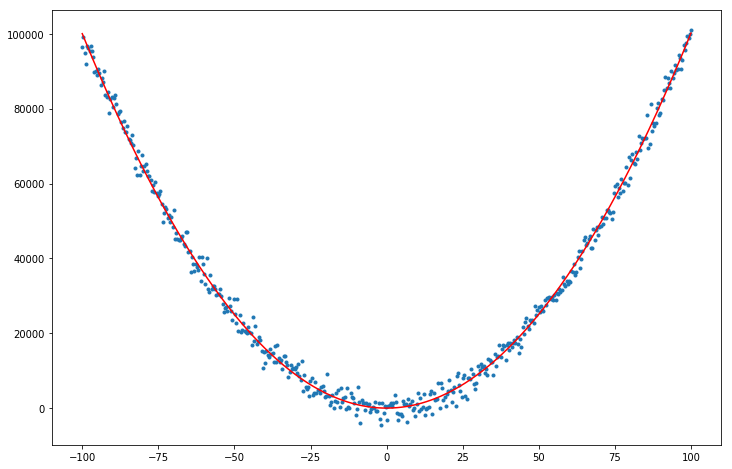

In [9]:
w, _,  _, _ = multivariate_linear_model(X, y, max_grad=100)
plt.figure(figsize=(12,8))
plt.plot(X[:,0], y, '.' , X[:,0], predict(X,w), 'r')
score(X,y,w)

We can see that the model has fitted the data very well

### Multiple Regression on Synthetic Data

y = x<sub>1</sub> + 2x<sub>2</sub> + 3x<sub>4</sub> + 4x<sub>4</sub> + 5x<sub>5</sub> + 6x<sub>6</sub> + 7x<sub>7</sub> + 8x<sub>8</sub> + 9x<sub>9</sub> + 10x<sub>10</sub> + 100

In [10]:
m = 1000             # No. of input examples
n = 10               # No. of input features

X = np.array([np.linspace(-100-i, 100+i, n) for i in range(m)])  # Synthetic data matrix of m rows and n cols
y = np.array([sum([x[j]*(j+1) for j in range(n)] + [100]) for x in X]).reshape(-1,1)  # y = x1 + 2*x2 + ... + 10*x10 + 100
y += np.random.randn(m, 1) * 1000          # Adding noise
print(X.shape, y.shape)

(1000, 10) (1000, 1)


#### Train_Test Split

In [19]:
train_size = int(0.8*m)
random_indices = np.random.permutation(m)
X_train = X[random_indices[:train_size], :]
X_test = X[random_indices[train_size:], :]
y_train = y[random_indices[:train_size], :]
y_test = y[random_indices[train_size:], :]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 10) (200, 10) (800, 1) (200, 1)


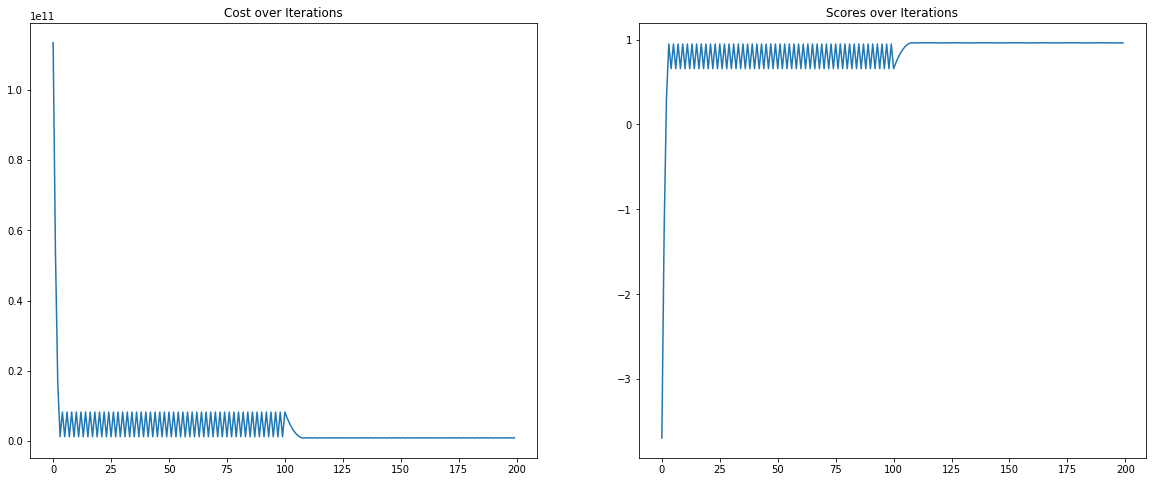

In [29]:
w, costs, scores, _ = multivariate_linear_model(X_train, y_train, max_iter=200, max_grad=100)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Cost over Iterations')
plt.plot(costs)
plt.subplot(1,2,2)
plt.title('Scores over Iterations')
plt.plot(scores)

We can clearly see in the above plots that the cost is decreasing and the score is increasing over time. Both cost and score oscillates between first and 100th iteration, but after that that's where the <b>Learning Rate Decay</b> comes in and solves the problem and the model converges to the optimum point.

In [30]:
score(X_test, y_test, w)

0.9578609313930384

The model also does really good on test data.

### Multiple Regression on Housing Data and Feature Normalization

In [31]:
df = pd.read_csv('data/LinearRegression_kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955.0,NaN,98178.0,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951.0,1991.0,98125.0,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933.0,NaN,98028.0,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965.0,NaN,98136.0,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987.0,NaN,98074.0,47.6168,-122.045


#### Feature Selection

In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [33]:
df.corr().loc['price'].sort_values(ascending=False) # Corelation of different columns with target column Price

price            1.000000
sqft_living      0.702031
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.127894
sqft_lot         0.089661
yr_built         0.054003
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053211
Name: price, dtype: float64

Selecting columns on the base of corelation with the Target column

In [34]:
selected_columns = ['price', 'sqft_living', 'sqft_above', 'sqft_basement']

In [35]:
df = df[selected_columns].dropna()
df.head()

,price,sqft_living,sqft_above,sqft_basement
0,221900,1180.0,1180,0
1,538000,2570.0,2170,400
2,180000,770.0,770,0
3,604000,1960.0,1050,910
4,510000,1680.0,1680,0


In [36]:
X = np.array(df[selected_columns[1:]])
y = np.array(df[selected_columns[0]]).reshape(-1,1)
print(X.shape, y.shape)

(21605, 3) (21605, 1)


#### Train_Test split

In [38]:
train_size = int(0.8*X.shape[0])
random_indices = np.random.permutation(X.shape[0])
X_train = X[random_indices[:train_size], :]
X_test = X[random_indices[train_size:], :]
y_train = y[random_indices[:train_size], :]
y_test = y[random_indices[train_size:], :]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17284, 3) (4321, 3) (17284, 1) (4321, 1)


#### Normalizing the input features

In [39]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train_normed = (X_train - means) / stds
X_train_normed.shape

(17284, 3)

#### Fitting model on normalized inputs

(0.49199715453187187, 469)

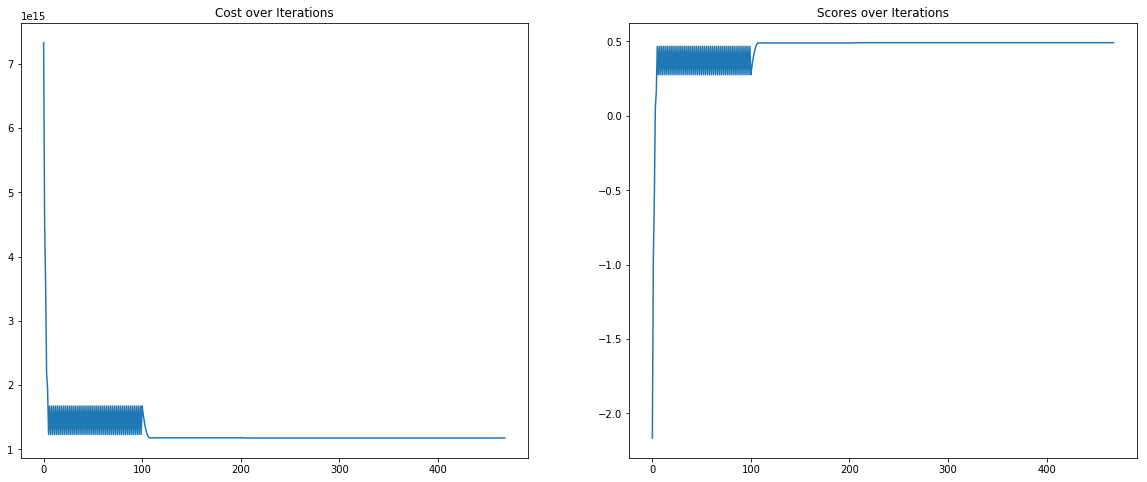

In [41]:
w, costs, scores, grads = multivariate_linear_model(X_train_normed, y_train, max_grad=1e7, tolerance=2)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Cost over Iterations')
plt.plot(costs)
plt.subplot(1,2,2)
plt.title('Scores over Iterations')
plt.plot(scores)
score(X_train_normed, y_train, w), len(scores)

In [42]:
score((X_test - means) / stds, y_test, w)

0.4979833896369634

We can see the model converged in just 469 iterations. One reason for faster convergence is feature normalization